In [33]:

import pickle
import numpy as np
from typing import List
import matplotlib.pyplot as plt
from graph import Graph

with open('data/graphs.dat', 'rb') as file:
    train_graphs: List[Graph] = pickle.load(file)


In [2]:
sum(g.is_connected() and not g.is_cyclic() for g in train_graphs) / len(train_graphs)

1.0

In [ ]:

graphs_with_family_id_overlap = []
for g in train_graphs:
    family_to_part_id = {}
    for p in g.get_parts():
        part_id = p.get_part_id()
        family_id = p.get_family_id()
        previous_part_id = family_to_part_id.get(family_id)
        if previous_part_id is None:
            family_to_part_id[family_id] = part_id
        elif previous_part_id != part_id:
            graphs_with_family_id_overlap.append(g)
            break

len(graphs_with_family_id_overlap) / len(train_graphs)

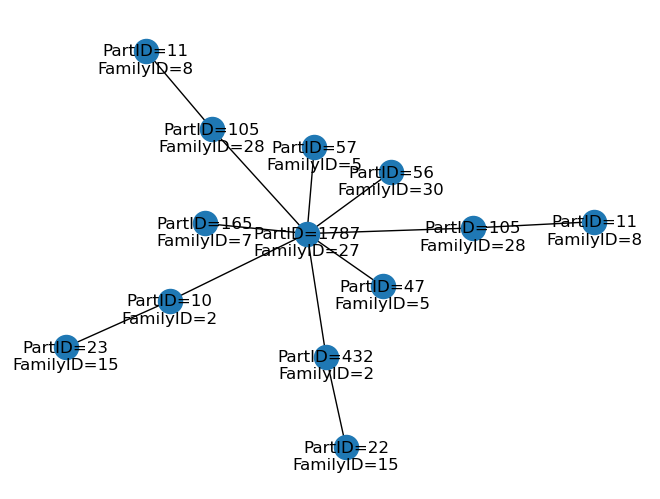

In [53]:
graphs_with_family_id_overlap[4].draw()

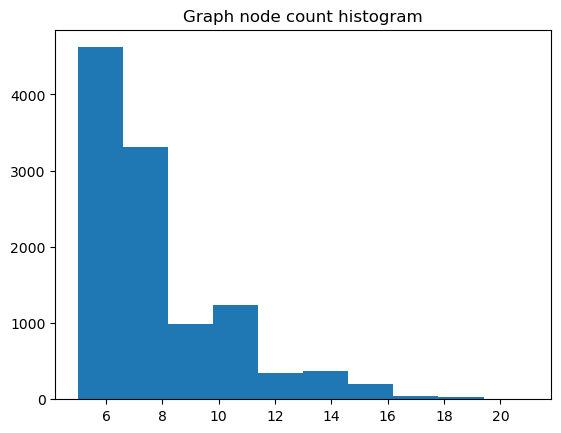

In [52]:
a = [len(g.get_nodes()) for g in train_graphs]
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Graph node count histogram")
plt.show()
# sum(len(g.get_nodes()) >= 17 for g in train_graphs) / len(train_graphs)

In [7]:
from unique_part import get_unique_parts

part_set = set()
for g in train_graphs:
    part_set.update(get_unique_parts(g))

part_list = list(part_set)
part_list.sort()
len(part_list)

1091